In [3]:
t_pulse = []
t_pulse.append([210,1])
t_pulse.append([80,0])
t_pulse.append([500,0])
t_pulse.append([500,1])
t_pulse.sort()

<IPython.core.display.Javascript object>


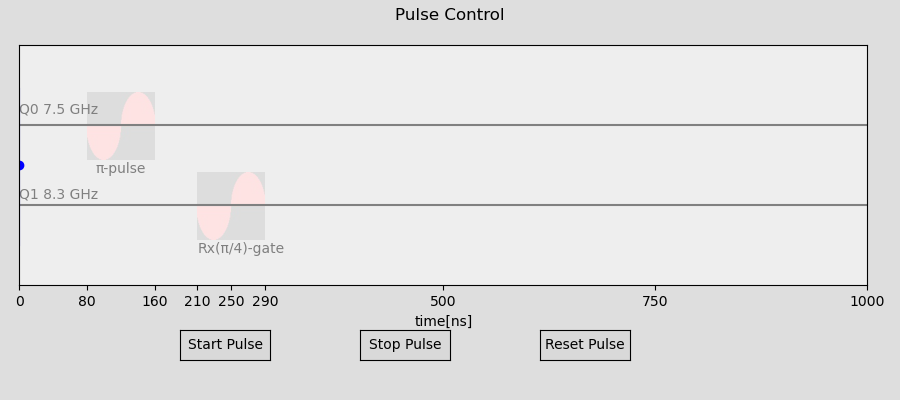

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import time
import threading
from matplotlib.widgets import Button
import matplotlib.image as mpimg

%matplotlib notebook

t_now = 0
t_stop = 0
def my_function(i):
    ax.clear()
    ax.patch.set_alpha(0.5)
    ax.plot(t,q0, color="gray")
    ax.plot(t,q1, color="gray")
    ax.scatter(t_now, 8, color="blue")
    ax.plot(np.ones(40) * t_now, np.arange(6, 10, 0.1), color="blue")
    ax.set(ylabel=None)
    ax.set(xlabel="time[ns]")
    ax.set_xticks(np.append((np.linspace(0, 1000, 5)),[210,290,80,160]))
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    ax.set_xlim(0,1000)
    ax.set_ylim(5,11)
    
    if t_now == t_pulse[0][0]-50:
        ax.scatter(t_now, 9 , color="green")
        
    if t_now == t_pulse[1][0]-50:
        ax.scatter(t_now, 7 , color="green")
        
    if t_now == t_pulse[0][0]:
        ax.scatter(t_now, 9 , color="black")
        
    if t_now == t_pulse[1][0]:
        ax.scatter(t_now, 7 , color="black")
    

class Index:
    ind = 0

    def pulse_start(self, event):
        global t_stop
        t_stop = 0
        threading.Thread(target=start).start()
        
    def pulse_stop(self, event):
        global t_stop
        t_stop = 1
        #threading.Thread(target=pulse_stop).start()
        
    def pulse_reset(self, event):
        global t_stop, t_now
        t_stop = 1
        t_now = 0
        
def start():
    #for i in range(10):        
    global t_now, t_stop
    t_start = t_now
    while t_now < 1000 and t_stop==0:
        #t_now += 1
        #t_now += 2
        t_now += 5
        #t_now += 10
        time.sleep(0.1)

        
fig = plt.figure(figsize=(9,4), facecolor='#DEDEDE', tight_layout=True,num='Pulse Manager')
fig.suptitle('Pulse Control', fontsize=12)
#fig.add_subplot()

pls = plt.gca()

pls.set_xlim(0, 1000)
pls.set_ylim(0, 380)
pls.axis("off")
#imgplot = plt.imshow(img, extent=(10,60,10,60))
img=mpimg.imread("pulse.jpg")
pls.imshow(img, extent=(80,160,255,335))
pls.text(0,310,"Q0 7.5 GHz")
pls.text(0,210,"Q1 8.3 GHz")
pls.text(80+10,255-15,"π-pulse")
pls.text(210,160-15,"Rx(π/4)-gate")
img=mpimg.imread("pulse.jpg")
pls.imshow(img, extent=(210,290,160,240))

#plt.imshow(img)

gs = fig.add_gridspec(4,4)
ax = fig.add_subplot(gs[0:3, 0:4], facecolor="white")
#ax = plt.gca()

#ax.set_xlim(0, 300)
#ax.set_ylim(0, 300)
#img=mpimg.imread("pulse.jpg")
#ax.imshow(img, extent=(10,160,10,160))

t = np.arange(0, 1000, 1)
q0 = np.ones(1000)*9
q1 = np.ones(1000)*7

callback = Index()

ax1 = fig.add_axes([0.2, 0.1, 0.1, 0.075])
ax2 = fig.add_axes([0.4, 0.1, 0.1, 0.075])
ax3 = fig.add_axes([0.6, 0.1, 0.1, 0.075])
b1 = Button(ax1, 'Start Pulse')
b1.on_clicked(callback.pulse_start)
b2 = Button(ax2, 'Stop Pulse')
b2.on_clicked(callback.pulse_stop)
b3 = Button(ax3, 'Reset Pulse')
b3.on_clicked(callback.pulse_reset)


# animate
ani = FuncAnimation(fig, my_function, interval=100)

plt.show()